# Architecture Evaluation

## Embedding Evaluation

In this section, we extract the reconstruction and prediction loss values. In the Embedding_Evaluation notebook, we will visualize how these models evolve over time.

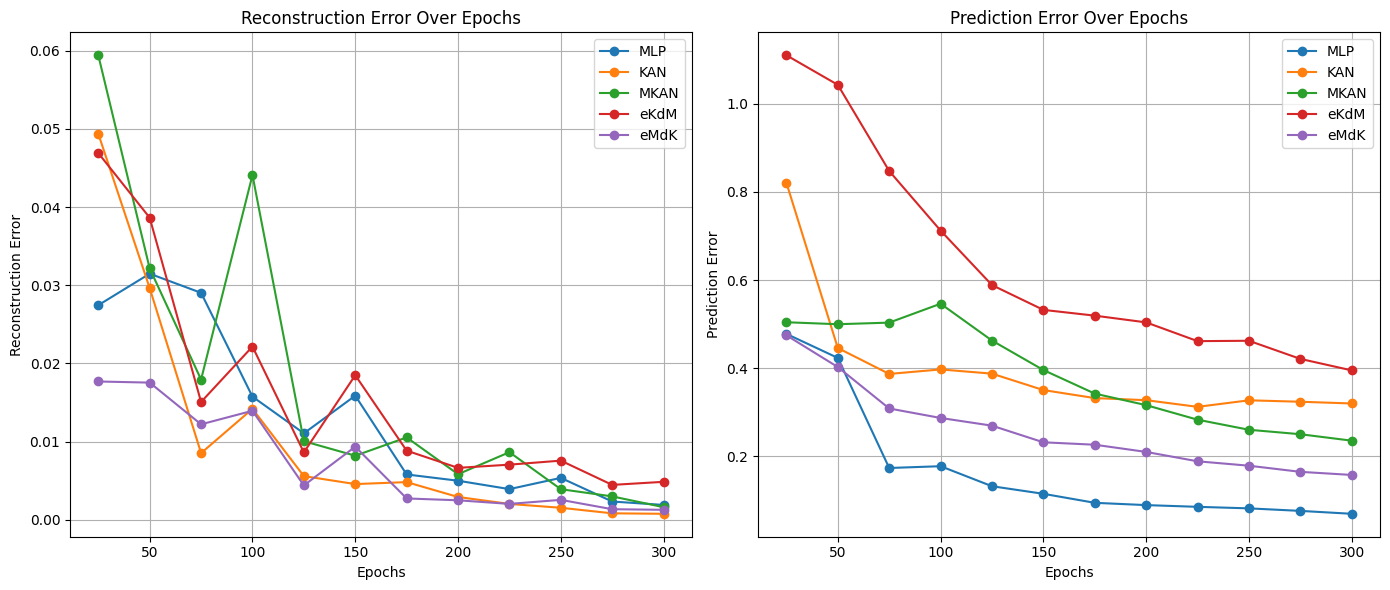

In [2]:

epochs = [25,50,75,100,125,150,175,200,225,250,275,300]


mlp_reconstruction = [0.02744327, 0.03147287, 0.02902632, 0.0157394, 0.01104731, 0.01586582, 0.00578623, 0.004985, 0.00391077, 0.00534836, 0.00232201, 0.0018877]

mlp_prediction = [0.47773418, 0.42316425, 0.17337239, 0.17743218, 0.13198619, 0.11478929, 0.09434714, 0.08913928, 0.08523812, 0.08174638, 0.07602059, 0.06942532]

kan_reconstruction = [0.04937859, 0.02962903, 0.00851674, 0.01418174, 0.00557595, 0.00455544, 0.00480675, 0.00290394, 0.00201363, 0.0015238, 0.0008133, 0.0007529]
kan_prediction = [0.82057476, 0.44563374, 0.38685015, 0.39705583, 0.38750064, 0.35021818, 0.3320185, 0.32730228, 0.31213984, 0.3269655, 0.32372516, 0.31980038]

mkan_reconstruction = [0.05942154, 0.03214712, 0.01792609, 0.04409625, 0.01003976, 0.00818274, 0.01052348, 0.00581778, 0.00863432, 0.0038991, 0.00297861, 0.0016011]
mkan_prediction = [0.50415045, 0.49965844, 0.5032932, 0.5462081, 0.46256816, 0.39570764, 0.3421962, 0.31599548, 0.28298303, 0.26013365, 0.25001568, 0.23536989]

eKdM_reconstruction = [0.04690761, 0.03863551, 0.01506031, 0.0221509, 0.00860989, 0.01848497, 0.00883122, 0.00663112, 0.00704039, 0.0075557, 0.00445061, 0.00484422]
eKdM_prediction = [1.1100637, 1.0429674, 0.84737396, 0.7121379, 0.5884786, 0.5322137, 0.51912016, 0.50382835, 0.46127522, 0.46209252, 0.42097342, 0.39489305]


eMdK_reconstruction = [0.01768122, 0.01753813, 0.01220129, 0.01393609, 0.00438164, 0.00934231, 0.00271625, 0.00248106, 0.00201978, 0.00253634, 0.00133978, 0.00126043]
eMdK_prediction = [0.47447914, 0.40247774, 0.3084175, 0.28690088, 0.26943702, 0.23168, 0.22618021, 0.20982853, 0.18855982, 0.17856441, 0.16464795, 0.15759052]


# plot two plots one for the reconstruction loss and the other for the prediction loss

import matplotlib.pyplot as plt

# Plotting Reconstruction Error
plt.figure(figsize=(14, 6))

# Reconstruction Error Plot
plt.subplot(1, 2, 1)
plt.plot(epochs, mlp_reconstruction, marker='o', label='MLP')
plt.plot(epochs, kan_reconstruction, marker='o', label='KAN')
plt.plot(epochs, mkan_reconstruction, marker='o', label='MKAN')
plt.plot(epochs, eKdM_reconstruction, marker='o', label='eKdM')
plt.plot(epochs, eMdK_reconstruction, marker='o', label='eMdK')
plt.xlabel('Epochs')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error Over Epochs')
plt.legend()
plt.grid(True)

# Prediction Error Plot
plt.subplot(1, 2, 2)
plt.plot(epochs, mlp_prediction, marker='o', label='MLP')
plt.plot(epochs, kan_prediction, marker='o', label='KAN')
plt.plot(epochs, mkan_prediction, marker='o', label='MKAN')
plt.plot(epochs, eKdM_prediction, marker='o', label='eKdM')
plt.plot(epochs, eMdK_prediction, marker='o', label='eMdK')
plt.xlabel('Epochs')
plt.ylabel('Prediction Error')
plt.title('Prediction Error Over Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## GPT Evaluation

In this section, we will begin by extracting the results for each GPT+Embedding model. These results can be found in the HDF5 files located in experiment/outputs/transformer_experiment/ntrain10240_epochs200_batch32/checkpoints. After reading the HDF5 files, we will save the results and then visualize all of them together for comparison.

In [5]:
import h5py
import numpy as np

def read_hdf5_file(file_path):
    with h5py.File(file_path, 'r') as f:
        # Print the keys
        print(f.keys())

        epochs = np.array(f['eval_epoch'])
        train = np.array(f['loss'])
        eval_loss = np.array(f['eval_error'])
        state_loss = np.array(f['state_error'])

        train_loss = []
        for i in epochs:
            train_loss.append(train[i-1])

        return eval_loss, state_loss, train_loss

# mlp file
mlp_file_path = './mlp/outputs/transformer_mlp/ntrain10240_epochs200_batch32/log_metrics.h5'
mlp_eval_loss, mlp_state_loss, mlp_train_loss = read_hdf5_file(mlp_file_path)

# print the values
print(f"mlp_eval_loss: {mlp_eval_loss}")
print(f"mlp_state_loss: {mlp_state_loss}")
print(f"mlp_train_loss: {mlp_train_loss}")

# kan file
kan_file_path = './KAN/outputs/transformer_KAN/ntrain10240_epochs200_batch32/log_metrics.h5'
kan_eval_loss, kan_state_loss, kan_train_loss = read_hdf5_file(kan_file_path)

# print the values
print(f"kan_eval_loss: {kan_eval_loss}")
print(f"kan_state_loss: {kan_state_loss}")
print(f"kan_train_loss: {kan_train_loss}")

# mkan file
mkan_file_path = './testing/outputs/transformer_testing/ntrain10240_epochs200_batch32/log_metrics.h5'
mkan_eval_loss, mkan_state_loss, mkan_train_loss = read_hdf5_file(mkan_file_path)

# print the values
print(f"mkan_eval_loss: {mkan_eval_loss}")
print(f"mkan_state_loss: {mkan_state_loss}")
print(f"mkan_train_loss: {mkan_train_loss}")

# eKdM file
eKdM_file_path = './eKdM/outputs/transformer_eKdM/ntrain10240_epochs200_batch32/log_metrics.h5'
eKdM_eval_loss, eKdM_state_loss, eKdM_train_loss = read_hdf5_file(eKdM_file_path)

# print the values
print(f"eKdM_eval_loss: {eKdM_eval_loss}")
print(f"eKdM_state_loss: {eKdM_state_loss}")
print(f"eKdM_train_loss: {eKdM_train_loss}")

# eMdK file
eMdK_file_path = './eMdK/outputs/transformer_eMdK/ntrain10240_epochs200_batch32/log_metrics.h5'
eMdK_eval_loss, eMdK_state_loss, eMdK_train_loss = read_hdf5_file(eMdK_file_path)

# print the values
print(f"eMdK_eval_loss: {eMdK_eval_loss}")
print(f"eMdK_state_loss: {eMdK_state_loss}")
print(f"eMdK_train_loss: {eMdK_train_loss}")


epochs =  [  1,  25,  50,  75, 100, 125, 150, 175, 200]



<KeysViewHDF5 ['epoch', 'eval_epoch', 'eval_error', 'loss', 'state_error', 'time_error']>
mlp_eval_loss: [0.09551449 0.02646317 0.01152328 0.00663854 0.0059455  0.04468177
 0.01975591 0.00703864 0.00463566]
mlp_state_loss: [868.65893555 278.00048828  87.68740845  52.03488922  50.72497559
 557.17053223 402.13604736  66.30576324  40.19529724]
mlp_train_loss: [0.010640441888545881, 2.819796079850651e-06, 2.560181391796421e-06, 1.3283651109738161e-06, 2.238538556495776e-06, 1.5618110185732994e-06, 1.185272404478708e-06, 9.115139587250488e-07, 7.969877985012819e-07]
<KeysViewHDF5 ['epoch', 'eval_epoch', 'eval_error', 'loss', 'state_error', 'time_error']>
kan_eval_loss: [0.07296674 0.04361618 0.01524048 0.01780136 0.01225126 0.04664258
 0.01649427 0.01573076 0.01362694]
kan_state_loss: [2008.64208984 1277.10925293  400.37524414  453.07281494  310.36804199
 1111.2019043   351.39465332  332.72949219  283.80999756]
kan_train_loss: [0.02154621291273805, 7.409642049204484e-07, 6.640286993500825e-

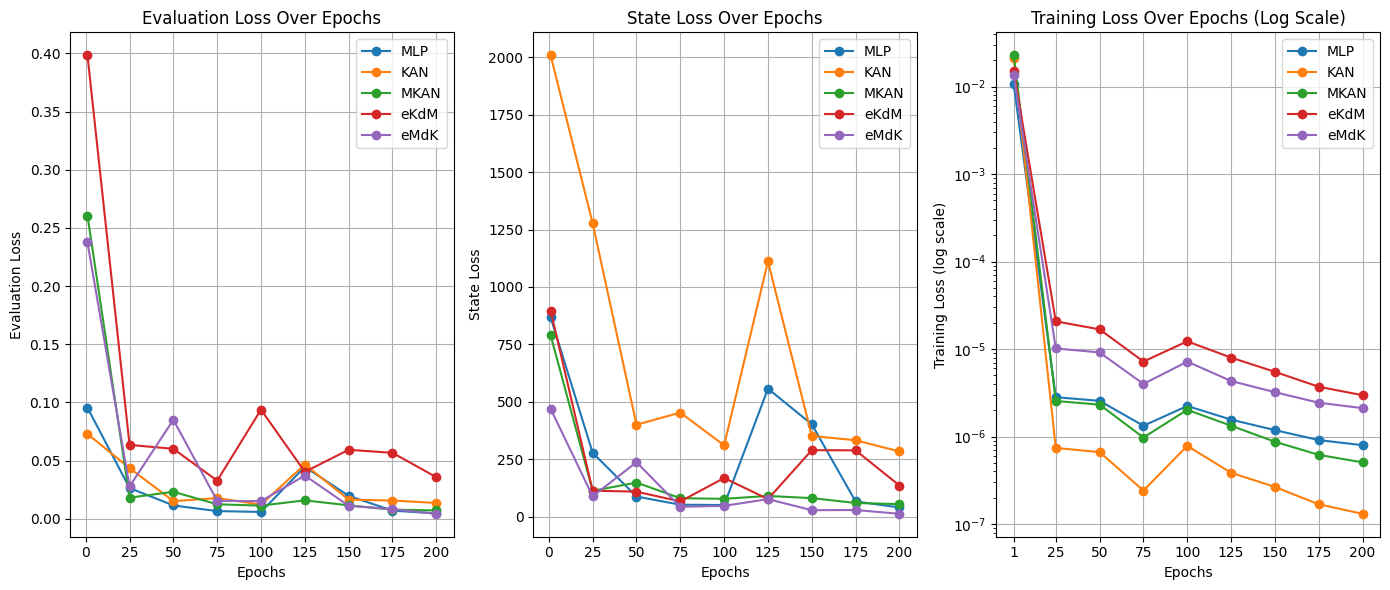

In [4]:

# make plot same as the previous one but for the evaluation loss and the state loss and the training loss

import matplotlib.pyplot as plt

# Plotting Reconstruction Error
plt.figure(figsize=(14, 6))

# Reconstruction Error Plot
plt.subplot(1, 3, 1)
plt.plot(epochs, mlp_eval_loss, marker='o', label='MLP')
plt.plot(epochs, kan_eval_loss, marker='o', label='KAN')
plt.plot(epochs, mkan_eval_loss, marker='o', label='MKAN')
plt.plot(epochs, eKdM_eval_loss, marker='o', label='eKdM')
plt.plot(epochs, eMdK_eval_loss, marker='o', label='eMdK')

plt.xlabel('Epochs')
plt.ylabel('Evaluation Loss')
plt.title('Evaluation Loss Over Epochs')
plt.legend()
plt.grid(True)

# Prediction Error Plot
plt.subplot(1, 3, 2)
plt.plot(epochs, mlp_state_loss, marker='o', label='MLP')
plt.plot(epochs, kan_state_loss, marker='o', label='KAN')
plt.plot(epochs, mkan_state_loss, marker='o', label='MKAN')
plt.plot(epochs, eKdM_state_loss, marker='o', label='eKdM')
plt.plot(epochs, eMdK_state_loss, marker='o', label='eMdK')
plt.xlabel('Epochs')
plt.ylabel('State Loss')
plt.title('State Loss Over Epochs')
plt.legend()
plt.grid(True)

# Training Loss Plot with logarithmic scale
plt.subplot(1, 3, 3)
plt.plot(epochs, mlp_train_loss, marker='o', label='MLP')
plt.plot(epochs, kan_train_loss, marker='o', label='KAN')
plt.plot(epochs, mkan_train_loss, marker='o', label='MKAN')
plt.plot(epochs, eKdM_train_loss, marker='o', label='eKdM')
plt.plot(epochs, eMdK_train_loss, marker='o', label='eMdK')
plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('Training Loss (log scale)')
plt.title('Training Loss Over Epochs (Log Scale)')
plt.legend()
plt.grid(True)
plt.xticks(epochs)

plt.tight_layout()
plt.show()

